# 2.3 Exercicis d'introducció a l'OpenCV

## Exercici 1
Fent servir les funcions d'opencv de dibuix, generar imatges similars a:
+ random_lines
+ random_circles
+ opencv_text

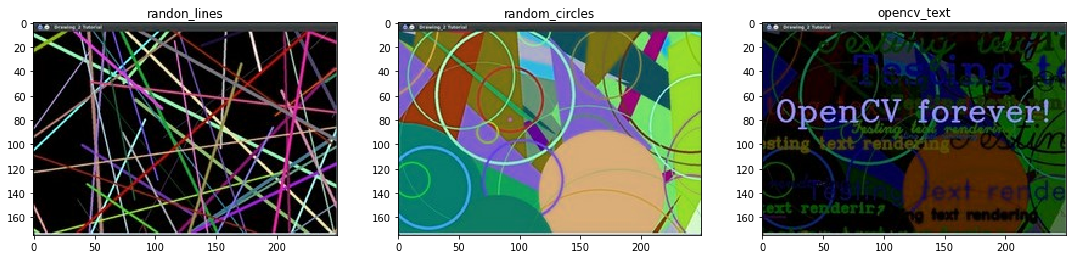

In [8]:
# Fent servir les funcions de dibuix de les OpenCV, crear imatges similars a aquestes:

import cv2
from matplotlib import pyplot as plt

im1 = cv2.imread('Imatges/random_lines.jpg')
im2 = cv2.imread('Imatges/random_circles.jpg')
im3 = cv2.imread('Imatges/opencv_text.jpg')

plt.subplot(1,3,1)
plt.title('randon_lines')
plt.imshow(im1)

plt.subplot(1,3,2)
plt.title('random_circles')
plt.imshow(im2)

plt.subplot(1,3,3)
plt.title('opencv_text')
plt.imshow(im3)

# mostrem la figura més gran per veure les imatges
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)



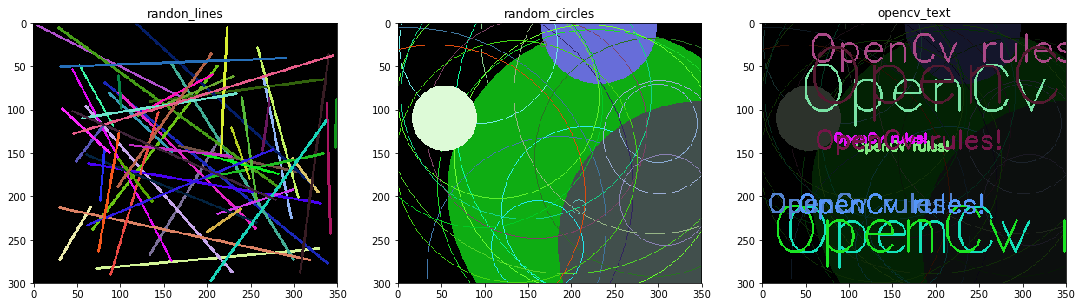

In [46]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# helpers
def random_point(width, height):
    point = (random.randrange(width), random.randrange(height))
    return point

def random_color():
    color = (random.randrange(256), random.randrange(256), random.randrange(256))
    return color

def adjust_brightness(img, factor):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:,:,2] = hsv[:,:,2]*factor
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

# Main functions
def draw_random_lines(img, n_lines):
    height, width, channels = img.shape
    for line in range(n_lines):
        start_point = random_point(width, height)
        end_point = random_point(width, height)
        color =  random_color()
        img_lines = cv2.line(img, start_point,end_point, color, 2)
    return img

def draw_random_circles(img, n_circles):
    height, width, channels = img.shape
    
    for circle in range(n_circles):
        center = random_point(width, height)
        radius = random.randrange(1, height*0.8)
        color =  random_color()
        thickness = random.randint(-1, 1)
        img_circles = cv2.circle(img, center, radius, color, thickness , 3)
    return img

def draw_text(img, n_sentences):    
    height, width, channels = img.shape
    for sentence in range(n_sentences):
        font = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = random_point(int(width/3), height)
        fontScale = random.randrange(1, 7) *0.5
        fontColor = random_color()
        lineType = 2
        img_text = cv2.putText(img,
                               'OpenCv rules!', 
                                bottomLeftCornerOfText, 
                                font, 
                                fontScale,
                                fontColor,
                                lineType)
    
    return img_text

black_image = np.zeros((300,350,3), np.uint8)
img_lines = draw_random_lines(black_image, 50)

plt.subplot(1,3,1)
plt.title('randon_lines')
plt.imshow(img_lines)

black_image = np.zeros((300,350,3), np.uint8)
img_circles = draw_random_circles(black_image, 30)

plt.subplot(1,3,2)
plt.title('random_circles')
plt.imshow(img_circles)

img_circles = adjust_brightness(img_circles, 0.2)
img_text = draw_text(img_circles, 10)

plt.subplot(1,3,3)
plt.title('opencv_text')
plt.imshow(img_text)

# mostrem la figura més gran per veure les imatges
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

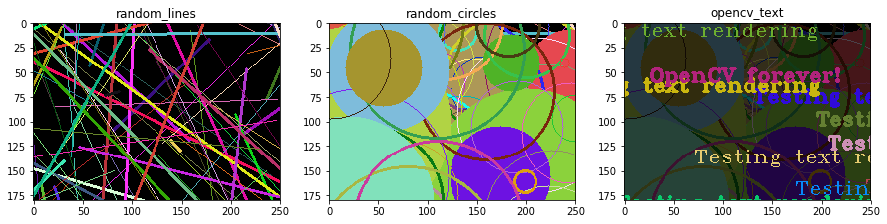

In [257]:
# EJERCICIO 01

import cv2
import numpy as np
import matplotlib.pyplot as plt


def adjust_brightness(img, factor):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:,:,2] = hsv[:,:,2]*factor
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

canvas = np.zeros((180, 250, 3), np.uint8)

# lineas random
for i in range(100):
    inicio = np.random.randint(-100, 250, size = (2,))
    fin = np.random.randint(-100,500, size = (2,))
    color = np.random.randint(0, 255, size = (3,)).tolist()
    grosor = np.random.randint(1,3)
    cv2.line(canvas, tuple(inicio), tuple(fin), color, grosor)
    
plt.subplot(2,3,1)
plt.title('random_lines')
plt.imshow(canvas)
    
# circulos random
for i in range(100):
    centro = np.random.randint(0, 255, size = (2,))
    radio = np.random.randint(5, 100)
    color = np.random.randint(0, 255, size = (3,)).tolist()
    grosor = np.random.randint(-1, 3)
    cv2.circle(canvas, tuple(centro), radio, color, grosor)

plt.subplot(2,3,2)
plt.title('random_circles')
plt.imshow(canvas)

# texto random
canvas = adjust_brightness(canvas, 0.3)

for i in range(10):
    inicio = np.random.randint(-100, 250, size = (2,))
    fuente = cv2.FONT_HERSHEY_COMPLEX_SMALL
    tamaño = np.random.randint(1, 2)
    color = np.random.randint(0, 255, size = (3,)).tolist()
    grosor = np.random.randint(1, 3)
    cv2.putText(canvas, "Testing text rendering", tuple(inicio), fuente, tamaño, color, grosor)

cv2.putText(canvas, "OpenCV forever!", (25,60), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, color, 2)
plt.subplot(2,3,3)
plt.title('opencv_text')
plt.imshow(canvas)

plt.gcf().set_size_inches(15,15)

## Exercici 2: Operacions aritmètiques amb imatges

Fent servir les funcions de les OpenCV i donades les imatges d'entrada _paisatge_ i _text_, generar una imatge similar a  exercici2_resultat




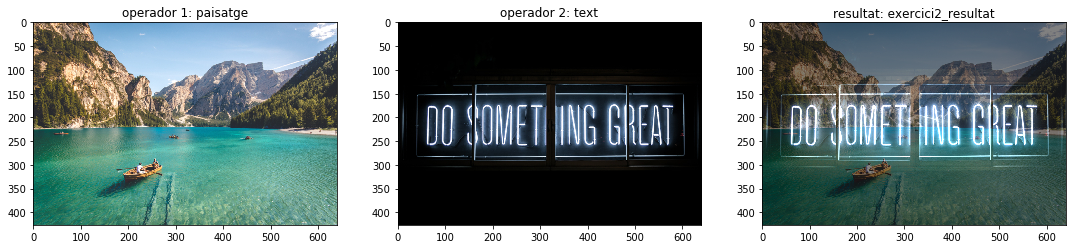

In [6]:
import cv2
from matplotlib import pyplot as plt

im1 = cv2.imread('Imatges/paisatge.jpg')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.imread('Imatges/text.jpg')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

im_resultat = cv2.addWeighted(im1, 0.5, im2, 1, 0)

plt.subplot(1,3,1)
plt.title('operador 1: paisatge')
plt.imshow(im1)

plt.subplot(1,3,2)
plt.title('operador 2: text')
plt.imshow(im2)

plt.subplot(1,3,3)
plt.title('resultat: exercici2_resultat')
plt.imshow(im_resultat)

# mostrem la figura més gran per veure les imatges
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


# Exercici 3

Fent servir les funcions de les OpenCV i donades les imatges d'entrada _paisatge_ i _text_, generar una imatge similar a _exercici3_resultat_


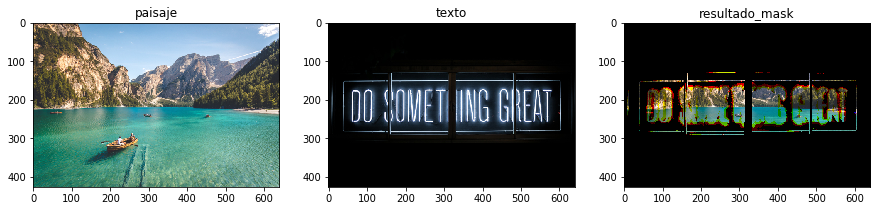

In [259]:
# EJERCICIO 03

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Imatges/paisatge.jpg')
paisaje = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_2 = cv2.imread('Imatges/text.jpg')
texto = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

r, texto_umbral = cv2.threshold(img_2, 50, 255, cv2.THRESH_BINARY)
texto_mask = cv2.bitwise_and(texto_umbral, paisaje)

plt.subplot(1,3,1)
plt.title('paisaje')
plt.imshow(paisaje)

plt.subplot(1,3,2)
plt.title('texto')
plt.imshow(texto)

plt.subplot(1,3,3)
plt.title('resultado_mask')
plt.imshow(texto_mask)

plt.gcf().set_size_inches(15, 15)

# Exercicis de segmentació d'imatges


## Exercici 4
Donada la imatge 'Imatges/Edifici.jpg', aplicar algun mètode per comptar el nombre de quadrats dins les finestres de l'edifici.

![](Imatges/Edifici.jpg)



DETECTED WINDOWS:  193


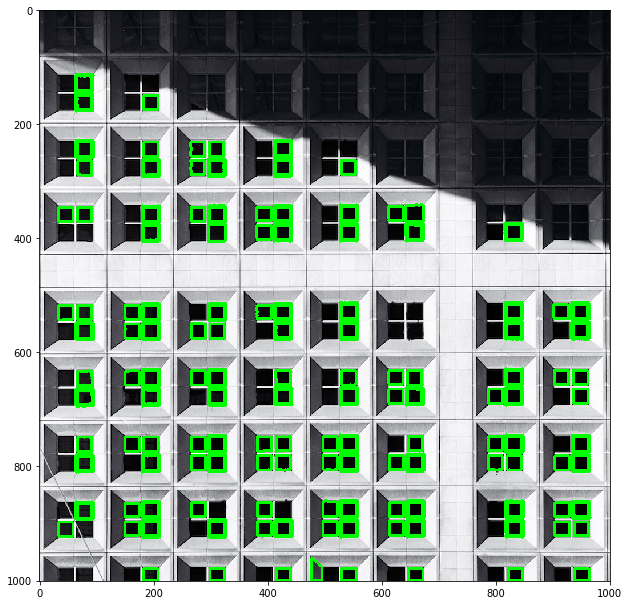

In [265]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

im = cv2.imread('Imatges/Edifici.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Step 1: adaptative threshold binarizer
im = cv2.adaptiveThreshold(im, 255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=5, C=13)

# Step 2: Find contours
_, contours, _ = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Step 3: Select contours that matches square and window area
selected_contours = []
for c in contours:
    area = cv2.contourArea(c)
    shape = cv2.approxPolyDP(c, 0.01*cv2.arcLength(c, True), True)
    if (area > 500) & (area < 1000):
        if len(shape) == 4:
            selected_contours.append(c)

detected_windows = len(selected_contours)
print('DETECTED WINDOWS: ', detected_windows)

im_blobs = np.zeros((im.shape[0],im.shape[1],3),dtype = np.uint8)
im_blobs[:,:,0] = im
im_blobs[:,:,1] = im
im_blobs[:,:,2] = im

im = cv2.imread('Imatges/Edifici.jpg')
cv2.drawContours(im, selected_contours, -1, (0,255,0), 3)
plt.imshow(im)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## Exercici 5
Donada la imatge 'Imatges/face_detection.jpeg', aplicar algun mètode per comptar el nombre de cares.

![](Imatges/face_detection.jpeg)




RESULT:  40


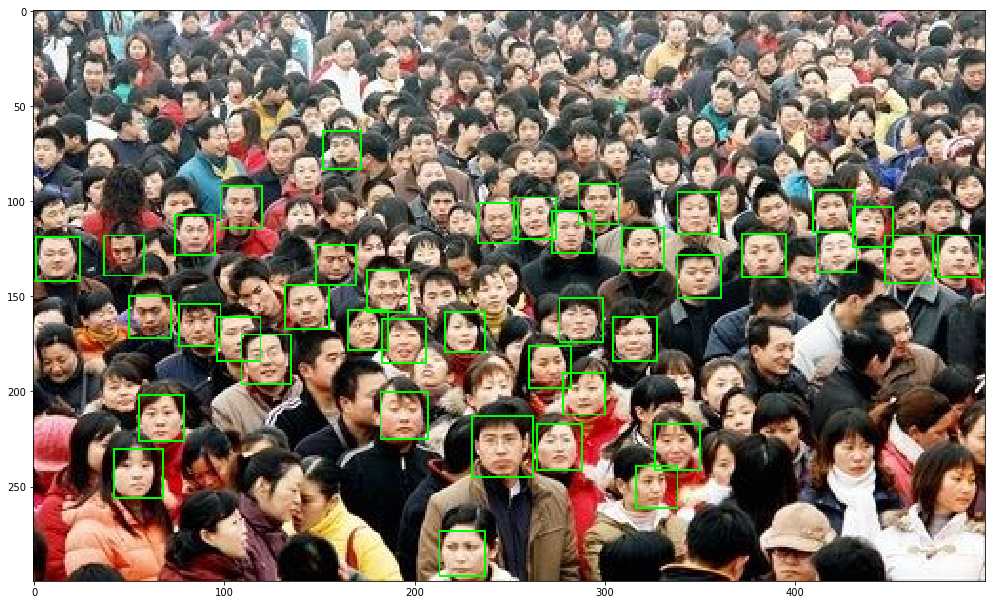

In [266]:
face_cascade = cv2.CascadeClassifier('/data/marc/curs_soc/Pla2/haarcascade_frontalface_default.xml')

# Read the input image
im = cv2.imread('Imatges/face_detection.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# Convert into grayscale
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# Detect faces and hyperparameter tunning
faces = face_cascade.detectMultiScale(gray, 1.1, 1)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(im, (x, y), (x+w, y+h), (0, 255, 0), 1)

print('RESULT: ', len(faces))
plt.imshow(im)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()